<a href="https://colab.research.google.com/github/rabinam24/NLP/blob/main/PatientCondition_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Patient Condition Classification

## Here the dataset used is kaggledataset
 https://www.kaggle.com/datasets/jessicali9530/kuc-hackathon-winter-2018

# Importing

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
import gensim
from gensim.models import Word2Vec,KeyedVectors
from wordcloud import WordCloud
from nltk.stem import PorterStemmer
from nltk import sent_tokenize
from gensim.utils import simple_preprocess
from sklearn.decomposition import PCA
import plotly.express as px
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import pickle
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df_train='/content/drive/MyDrive/drugsComTrain_raw.csv'
df_test='/content/drive/MyDrive/drugsComTest_raw.csv'


In [4]:
df= pd.read_csv(df_train)

In [5]:
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [6]:
df.shape

(161297, 7)

In [7]:
df['condition'].value_counts()

Birth Control                                              28788
Depression                                                  9069
Pain                                                        6145
Anxiety                                                     5904
Acne                                                        5588
                                                           ...  
Dissociative Identity Disorde                                  1
Hydrocephalus                                                  1
Hyperlipoproteinemia Type III, Elevated beta-VLDL   IDL        1
Q Feve                                                         1
Neutropenia                                                    1
Name: condition, Length: 884, dtype: int64

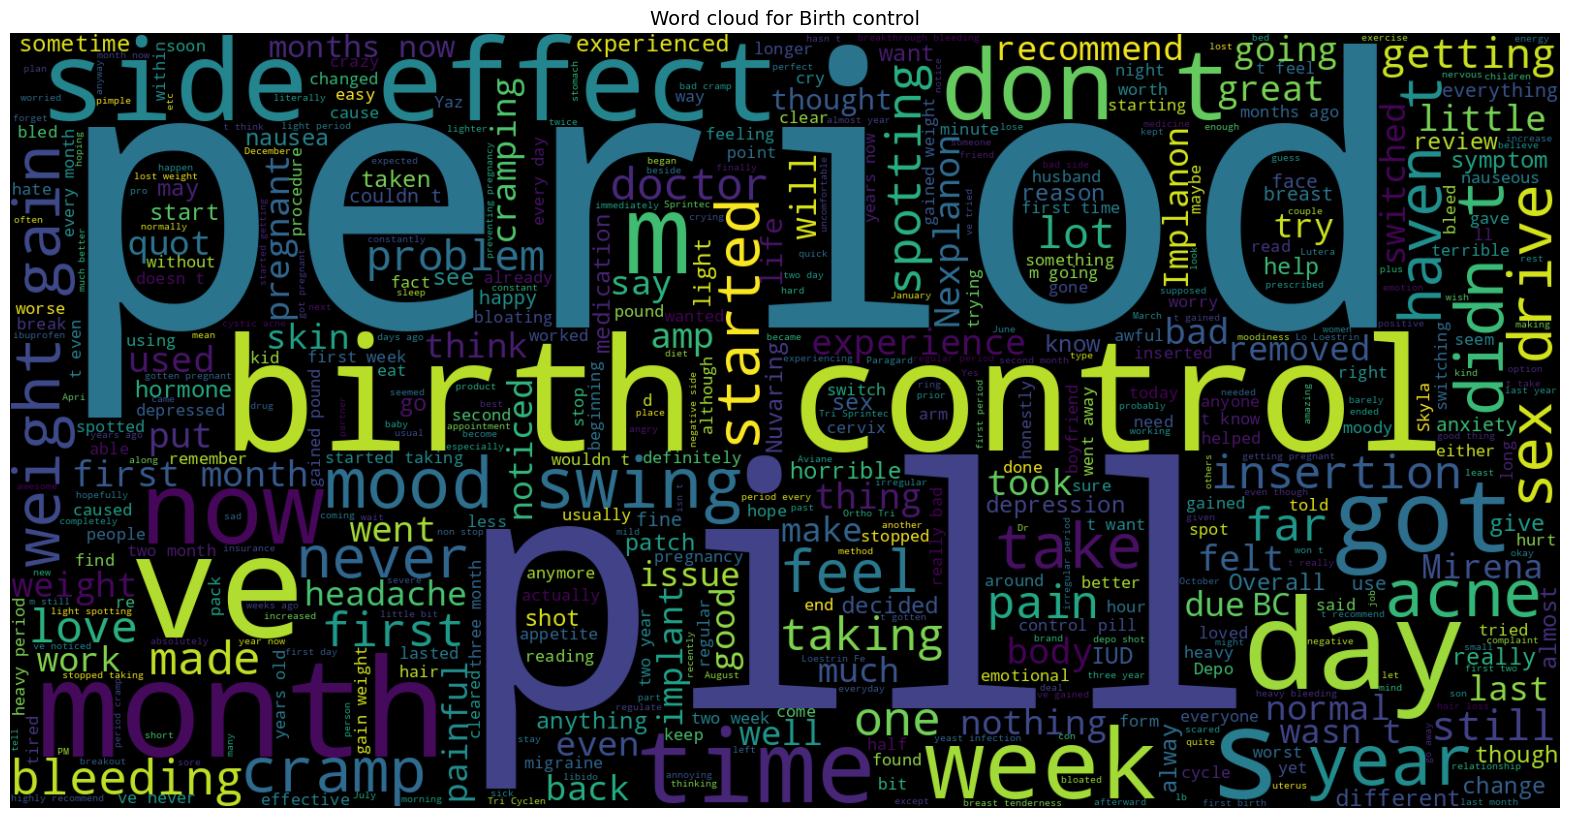

In [8]:
# Filter DataFrame for the specified condition
birth_control_reviews = df[df['condition'] == 'Birth Control']

# Generate WordCloud
plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=500, width=1600, height=800).generate(" ".join(birth_control_reviews['review']))
plt.imshow(wc, interpolation='bilinear')
plt.title('Word cloud for Birth control', fontsize=14)
plt.axis('off')  # Turn off axis
plt.show()


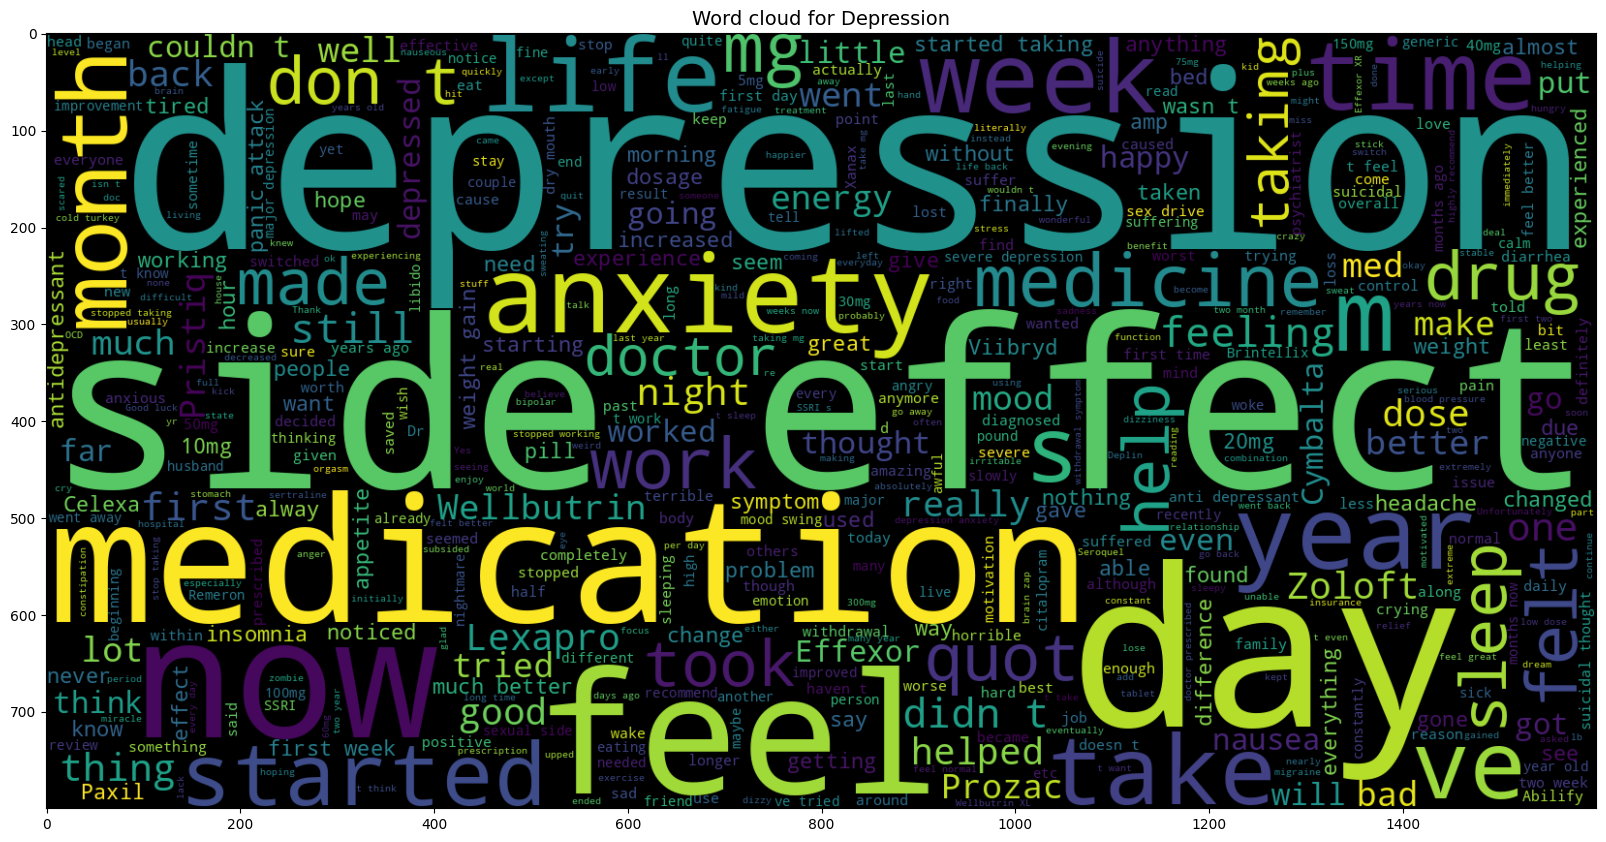

In [9]:
depression_reviews = df[df['condition'] == 'Depression']
plt.figure(figsize=(20, 20))  # Text that is Fake News Headlines
wc = WordCloud(max_words=500, width=1600, height=800).generate(" ".join(depression_reviews['review']))
plt.imshow(wc, interpolation='bilinear')
plt.title('Word cloud for Depression', fontsize=14)
plt.show()


In [10]:
highbloodpressure_reviews = df[df['condition'] == 'highbloodpressure']

# Check for null or empty values in the 'review' column
null_or_empty_reviews = highbloodpressure_reviews['review'].isnull() | (highbloodpressure_reviews['review'] == '')

if null_or_empty_reviews.all():
    print("No valid reviews for High Blood Pressure condition.")
else:
    plt.figure(figsize=(20, 20))
    wc = WordCloud(max_words=500, width=1600, height=800).generate(" ".join(highbloodpressure_reviews['review']))
    plt.imshow(wc, interpolation='bilinear')
    plt.title('Word cloud for High Blood Pressure', fontsize=14)
    plt.show()


No valid reviews for High Blood Pressure condition.


In [12]:
df['review'][2]


'"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas."'

In [15]:
for i, col in enumerate(df.columns):
    df.iloc[:, i] = df.iloc[:, i].astype(str).str.replace('"', '')


In [16]:
# To set the width of the column to maximum
pd.set_option('max_colwidth', -1)

<ipython-input-16-a7edaab304c3>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


In [17]:
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil",9,20-May-12,27
1,95260,Guanfacine,ADHD,"My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective.",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas.",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"Suboxone has completely turned my life around. I feel healthier, I&#039;m excelling at my job and I always have money in my pocket and my savings account. I had none of those before Suboxone and spent years abusing oxycontin. My paycheck was already spent by the time I got it and I started resorting to scheming and stealing to fund my addiction. All that is history. If you&#039;re ready to stop, there&#039;s a good chance that suboxone will put you on the path of great life again. I have found the side-effects to be minimal compared to oxycontin. I&#039;m actually sleeping better. Slight constipation is about it for me. It truly is amazing. The cost pales in comparison to what I spent on oxycontin.",9,27-Nov-16,37


In [18]:

stop = stopwords.words('english')

In [19]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [23]:
porter = PorterStemmer()

lemmatizer = WordNetLemmatizer()

In [24]:

print(porter.stem("sportingly"))
print(porter.stem("very"))
print(porter.stem("troubled"))

sportingli
veri
troubl


In [26]:
nltk.download('wordnet')

print(lemmatizer.lemmatize("sportingly"))
print(lemmatizer.lemmatize("very"))
print(lemmatizer.lemmatize("troubled"))


[nltk_data] Downloading package wordnet to /root/nltk_data...


sportingly
very
troubled


In [27]:

from bs4 import BeautifulSoup
import re

In [28]:

def review_to_words(raw_review):
    # 1. Delete HTML
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. lower letters
    words = letters_only.lower().split()
    # 5. Stopwords
    meaningful_words = [w for w in words if not w in stop]
    # 6. lemmitization
    lemmitize_words = [lemmatizer.lemmatize(w) for w in meaningful_words]
    # 7. space join words
    return( ' '.join(lemmitize_words))

In [ ]:
df['review_clean'] = df['review'].apply(review_to_words)

<ipython-input-28-96d5791fc591>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(raw_review, 'html.parser').get_text()


In [ ]:
df.head()